In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [7]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [8]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [10]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

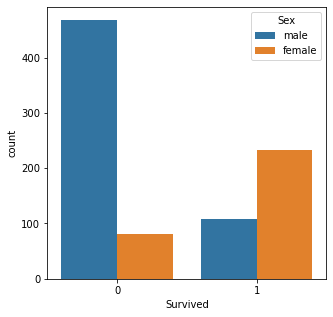

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(titanic['Survived'], hue=titanic['Sex'])

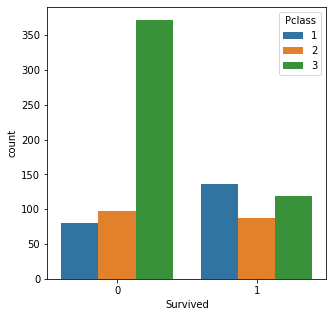

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(titanic['Survived'], hue=titanic['Pclass'])

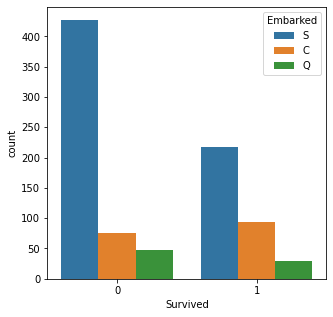

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(titanic['Survived'], hue=titanic['Embarked'])

In [14]:
# plt.figure(figsize=(5,5))
# sns.countplot(titanic['Survived'])

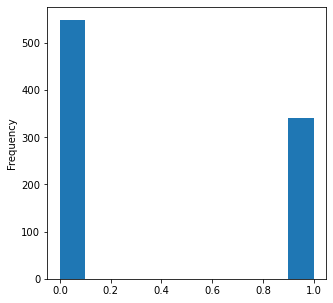

In [15]:
plt.figure(figsize=(5,5))
titanic['Survived'].plot.hist()

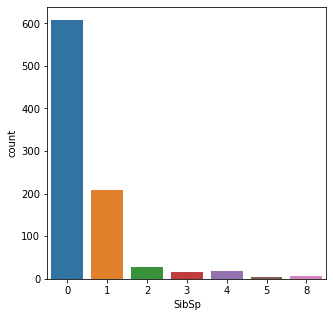

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(titanic['SibSp'])

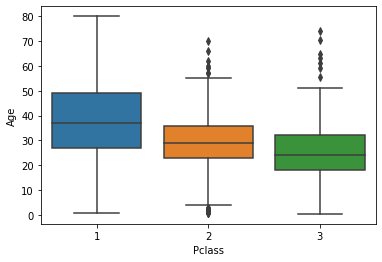

In [17]:
sns.boxplot(titanic['Pclass'],titanic['Age'] )

In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

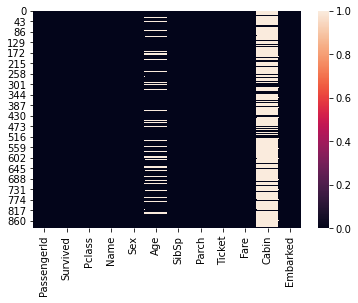

In [19]:
sns.heatmap(titanic.isnull())

In [20]:
# Cabin column have so many null values so we can drop that

titanic.drop(columns=['Cabin'], axis=1, inplace=True)

In [21]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [22]:
# we can fill age by mean of that
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [23]:
titanic.dropna(inplace=True)

In [24]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_pclass = LabelEncoder()
le_embarked = LabelEncoder()

In [26]:
titanic['Sex_n'] = le_sex.fit_transform(titanic['Sex'])
titanic['Pclass_n'] = le_pclass.fit_transform(titanic['Pclass'])
titanic['Embarked_n'] = le_pclass.fit_transform(titanic['Embarked'])

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_n,Pclass_n,Embarked_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,2,2


In [28]:
titanic.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [29]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Sex_n,Pclass_n,Embarked_n
0,0,22.0,1,0,7.2500,1,2,2
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,2,2
3,1,35.0,1,0,53.1000,0,0,2
4,0,35.0,0,0,8.0500,1,2,2


In [30]:
X = titanic.drop("Survived", axis=1)
y = titanic['Survived']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 50)

In [32]:
clf = DecisionTreeClassifier()

In [33]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
clf.score(x_train,y_train)

0.9823151125401929

In [35]:
pred = clf.predict(x_test)

In [36]:
clf.score(x_test, y_test)

0.7715355805243446

Let's try to increase accuracy

In [37]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [39]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid_param, cv=5, n_jobs=-1)

In [40]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [42]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 17,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [43]:
grid_search.best_score_

0.8375999999999999

In [44]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 17, min_samples_leaf =4, min_samples_split=2, splitter = 'random')

In [45]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [46]:
clf.score(x_train,y_train)

0.8488745980707395

In [47]:
clf.score(x_test, y_test)

0.7865168539325843